## A binary decision tree classifier using the 470-feature data set.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

df = pd.read_csv('CSV/feature_vectors_470.csv', index_col=False)

In [10]:
df.head(n=2)

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1


In [11]:
df.keys()

Index(['ACCESS_PERSONAL_INFO___', 'ALTER_PHONE_STATE___', 'ANTI_DEBUG_____',
       'CREATE_FOLDER_____', 'CREATE_PROCESS`_____', 'CREATE_THREAD_____',
       'DEVICE_ACCESS_____', 'EXECUTE_____', 'FS_ACCESS____',
       'FS_ACCESS()____',
       ...
       'utimes', 'vfork', 'vibrate', 'vibratePattern', 'wait4',
       'watchRotation', 'windowGainedFocus', 'write', 'writev', 'Class'],
      dtype='object', length=471)

In [12]:
len(df.index)

11598

In [13]:
features = df.iloc[0:11598,0:469].values
y = df['Class'].values

In [14]:
features_train, features_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=42)

In [15]:
y_train_5 = (y_train!=5)
y_test_5 = (y_test!=5)

In [16]:
scaler = preprocessing.StandardScaler().fit(features_train)

In [17]:
features_scaled = scaler.transform(features_train)

In [18]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(features_scaled, y_train_5)

DecisionTreeClassifier()

In [19]:
cross_val_score(dt_clf, features_scaled, y_train_5, cv=5, scoring="accuracy", verbose=True)

array([0.95797414, 0.96982759, 0.9606681 , 0.96495957, 0.9574124 ])

In [20]:
y_train_pred = cross_val_predict(dt_clf, features_scaled, y_train_5, cv=5)

In [21]:
confusion_matrix(y_train_5, y_train_pred)

array([[1272,  175],
       [ 163, 7668]])

In [22]:
precision_score(y_train_5, y_train_pred)

0.9776871095244167

In [23]:
recall_score(y_train_5, y_train_pred)

0.9791852892350913

In [24]:
f1_score(y_train_5, y_train_pred)

0.978435625877249

In [25]:
tn,fp,fn,tp = confusion_matrix(y_train_5,y_train_pred).ravel()

In [26]:
tn,fp,fn,tp

(1272, 175, 163, 7668)

In [27]:
test_scaler = preprocessing.StandardScaler().fit(features_test)

In [28]:
features_scaled = scaler.transform(features_test)

In [29]:
y_test_pred = cross_val_predict(dt_clf, features_scaled, y_test_5, cv=3)

In [30]:
confusion_matrix(y_test_5, y_test_pred)

array([[ 291,   57],
       [  46, 1926]])

In [31]:
precision_score(y_test_5, y_test_pred)

0.9712556732223904

In [32]:
recall_score(y_test_5, y_test_pred)

0.9766734279918864

In [33]:
f1_score(y_test_5, y_test_pred)

0.9739570164348925

In [34]:
tn,fp,fn,tp = confusion_matrix(y_test_5, y_test_pred).ravel()

In [35]:
tn,fp,fn,tp

(291, 57, 46, 1926)

In [36]:
confusion_matrix(y_test_5, y_test_pred, normalize='all')

array([[0.12543103, 0.02456897],
       [0.01982759, 0.83017241]])

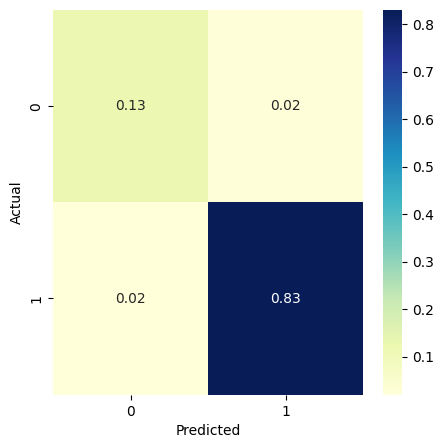

In [37]:
cm = confusion_matrix(y_test_5, y_test_pred, normalize='all')
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='.2f', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

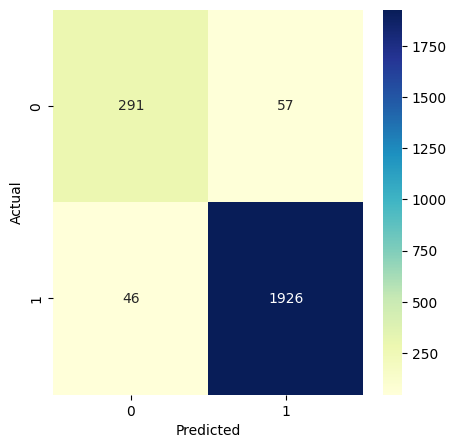

In [39]:
cm = confusion_matrix(y_test_5, y_test_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)